# Testing DRFL algorithm

The purpose of this paper consists on testing about how is working the implemented algorithm.

This algorithm works with time series, taking as input a pd.Series data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import DRFL
import random
import matplotlib.cm as cm


# Creating and Visualizing Easy Time-Series

Let's create a time series for detecting two target routines. Each routine will have a noise parameter (to give more realism) 

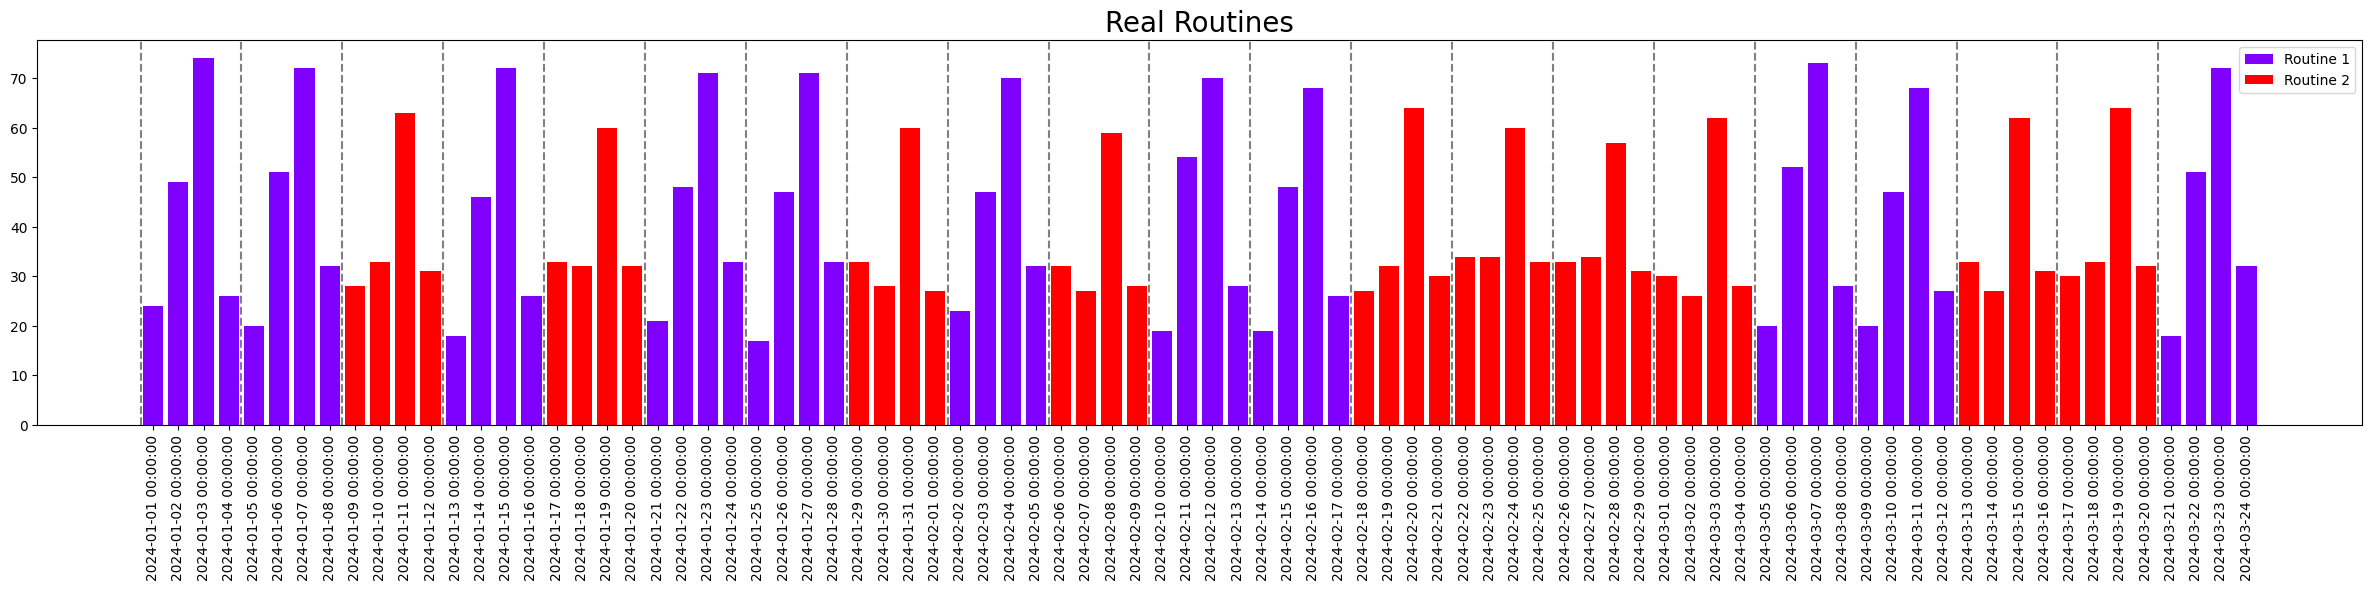

In [7]:
# PARAMS
target_routine_1 = [20, 50, 70, 30]
target_routine_2 = [30, 30, 60, 30]
noise_threshold_minutes = 4
T_max = 21
idx_routine1 = [0,1,3,5,6,8,10,11,16,17,20]

def randomized_routine(routine, noise_threshold):
    return [random.randint(x-noise_threshold, x+noise_threshold) for x in routine]

def get_colors(idx_routine):
    base_colors = cm.rainbow(np.linspace(0, 1, 2))
    colores = []
    for x in range(T_max):
        if x in idx_routine:
            for y in range(len(target_routine_1)):
                colores.append(base_colors[0])
        else:
            for y in range(len(target_routine_1)):
                colores.append(base_colors[1])
    return colores


def plot_groundtruth(time_series):
    ts = np.array(time_series)
    # Plotting the bar chart with vertical lines every 4 bars
    plt.figure(figsize=(30,5))
    bars = plt.bar(x=[x for x in range(len(ts))], height=ts, color=get_colors(idx_routine1))

    # Draw a vertical line every four bars
    for i in range(0, len(ts), len(target_routine_1)):
        plt.axvline(x=i-0.5, color='grey', linestyle='--')
    plt.xticks(ticks=[x for x in range(len(ts))], labels=pd.date_range(start="2024-01-01", periods=len(ts)),
               rotation=90)
    # add_legend
    plt.legend([bars[0], bars[10]], ['Routine 1', 'Routine 2'])
    plt.title("Real Routines", fontsize=20)
    plt.show()



time_series = []
for x in range(T_max):
    if x in idx_routine1:
        random_1 = randomized_routine(target_routine_1, noise_threshold_minutes)
        for y in random_1:
            time_series.append(y)
    else:
        random_2 = randomized_routine(target_routine_2, noise_threshold_minutes)
        for y in random_2:
            time_series.append(y)
            
plot_groundtruth(time_series)

Reds owns to the routine target 1, and blues owns to routine target 2

In [8]:
time_series = pd.DataFrame(
    {
        "Date": pd.date_range(start="2024-01-01", periods=len(time_series)),
        "Time-Series": time_series
    }
).set_index("Date")["Time-Series"]

# Testing DRFL with OVERLAP (epsilon = 1)

Now that we have synthetised data, lets detect the routines with DRFL algorithm:

We'll use as fixed param: 
m = 4


In [9]:
routine_detector = DRFL(m=4, R=10, C=5, G=50, epsilon=1)
routine_detector.fit(time_series)
routine_detector.show_results()

Routines detected:  8
__________________________________________________
Centroid 1: [20.1 48.9 70.9 29.1]
Routine 1: [array([24, 49, 74, 26], dtype=int64), array([20, 51, 72, 32], dtype=int64), array([18, 46, 72, 26], dtype=int64), array([21, 48, 71, 33], dtype=int64), array([17, 47, 71, 33], dtype=int64), array([23, 47, 70, 32], dtype=int64), array([19, 54, 70, 28], dtype=int64), array([19, 48, 68, 26], dtype=int64), array([20, 52, 73, 28], dtype=int64), array([20, 47, 68, 27], dtype=int64)]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-21 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [48.9 70.9 29.1 26.2]
Routine 2: [array([49, 74, 26, 20], dtype=int64), array([51, 72

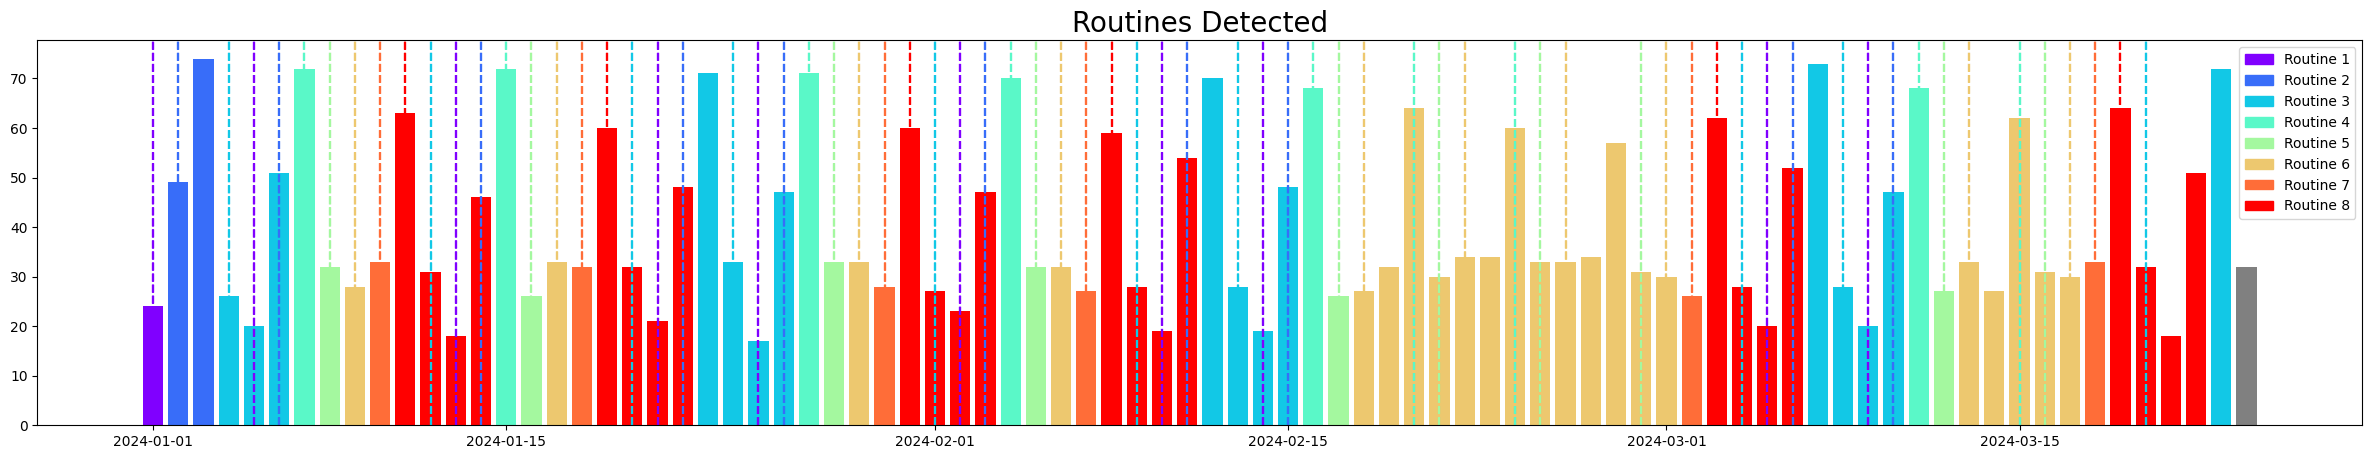

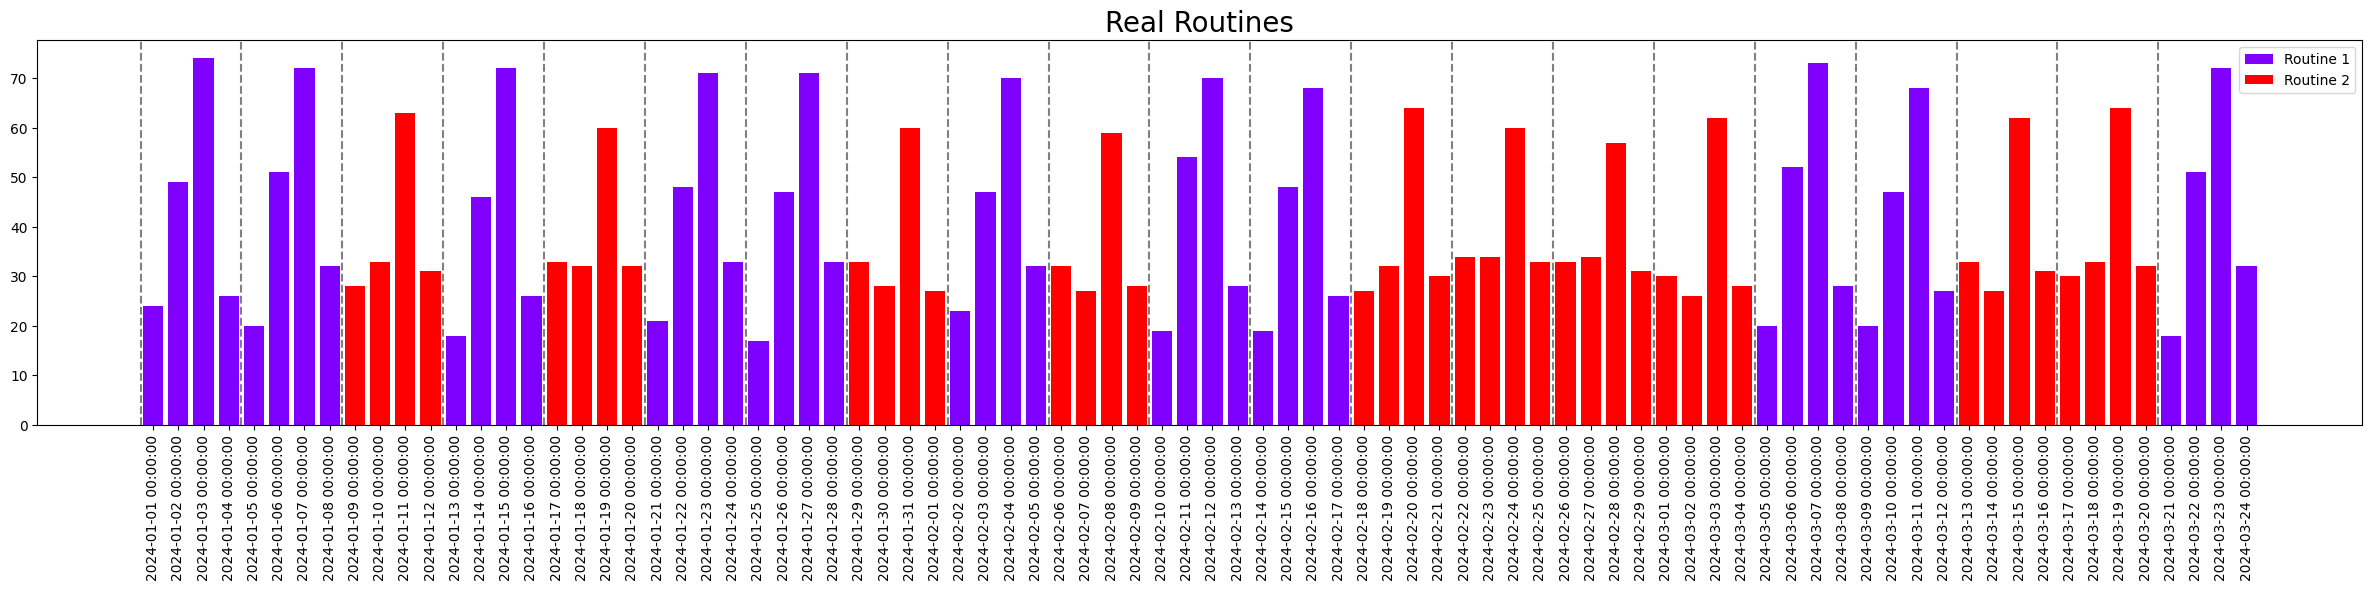

In [10]:
routine_detector.plot_results(
    title="Routines Detected",
    figsize=(30, 5),
    title_fontsize=20
)

plot_groundtruth(time_series)



# Testing DRFL with less Overlap (epsilon=0.5)

We see overlapping, so let's reduce the epsilon param to 0.5

In [11]:
routine_detector = DRFL(m=4, R=5, C=5, G=50, epsilon=0.5)
routine_detector.fit(time_series)
routine_detector.show_results()
routines_detected = routine_detector.get_results()

Routines detected:  2
__________________________________________________
Centroid 1: [29.625 19.5   48.125 70.5  ]
Routine 1: [array([26, 20, 51, 72], dtype=int64), array([31, 18, 46, 72], dtype=int64), array([32, 21, 48, 71], dtype=int64), array([33, 17, 47, 71], dtype=int64), array([27, 23, 47, 70], dtype=int64), array([28, 19, 48, 68], dtype=int64), array([28, 20, 47, 68], dtype=int64), array([32, 18, 51, 72], dtype=int64)]
Date 1: [Timestamp('2024-01-04 00:00:00'), Timestamp('2024-01-12 00:00:00'), Timestamp('2024-01-20 00:00:00'), Timestamp('2024-01-24 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-13 00:00:00'), Timestamp('2024-03-08 00:00:00'), Timestamp('2024-03-20 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [31.25  31.625 60.875 30.5  ]
Routine 2: [array([28, 33, 63, 31], dtype=int64), array([33, 32, 60, 32], dtype=int64), array([33, 28, 60, 27], dtype=int64), array([32, 27, 59, 28], dtype=int64), array([27, 32, 64, 30], dty

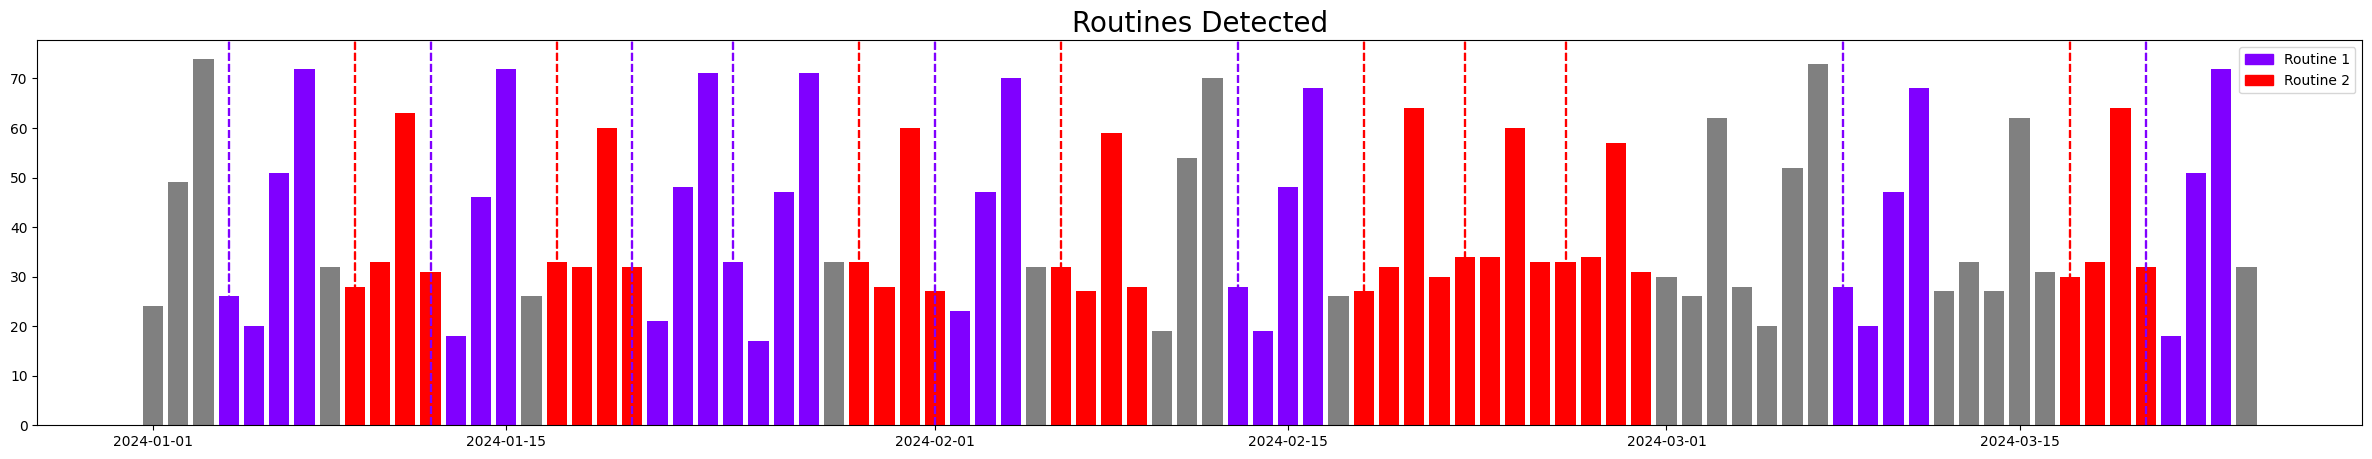

TypeError: plot_groundtruth() missing 1 required positional argument: 'time_series'

In [12]:
routine_detector.plot_results(
    title="Routines Detected",
    figsize=(30, 5),
    title_fontsize=20
)

plot_groundtruth()

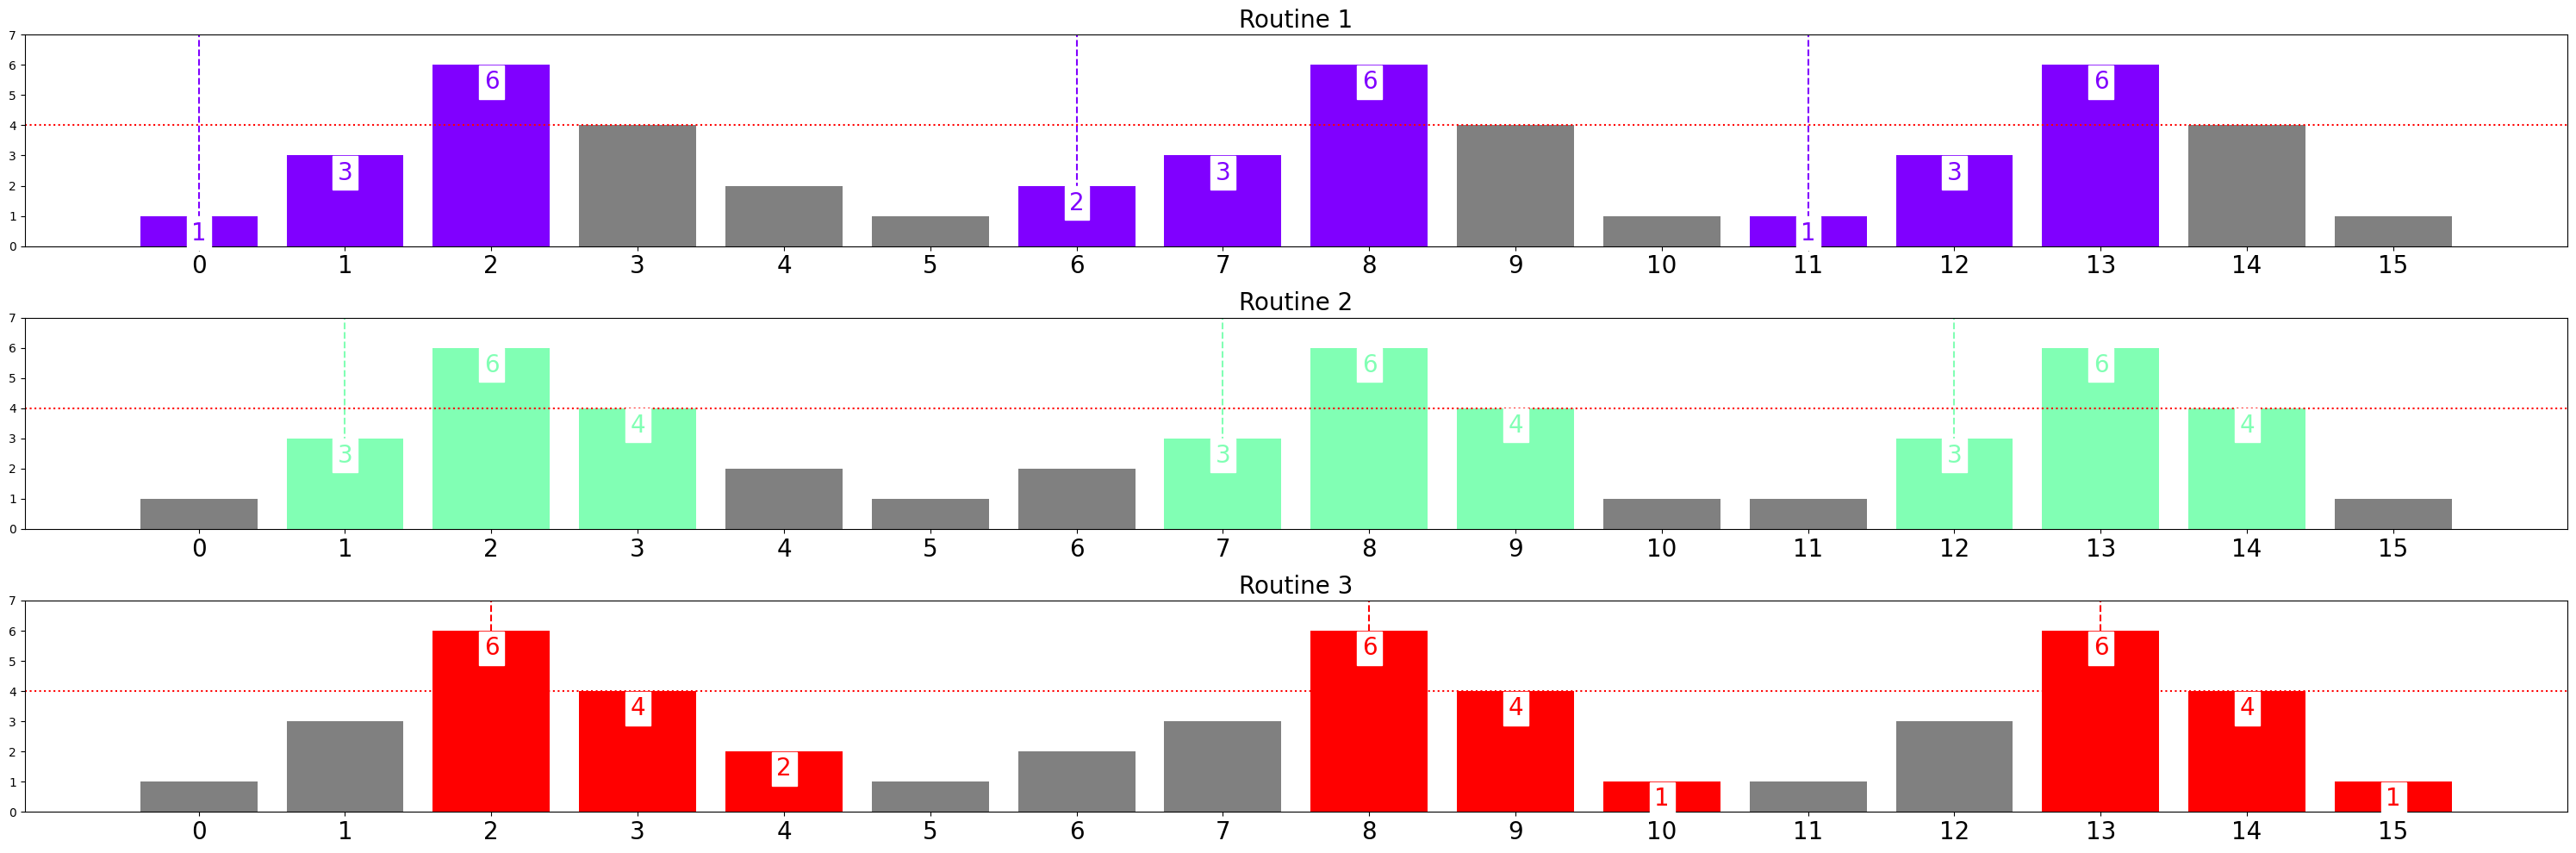

In [65]:
from src.DRFL import DRFL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

time_series = np.array([1, 3, 6, 4, 2, 1, 2, 3, 6, 4, 1, 1, 3, 6, 4, 1])
time_series = pd.DataFrame(
    {
        "Date": pd.date_range(start="2024-01-01", periods=len(time_series)),
        "Time-Series": time_series
    }
).set_index("Date")["Time-Series"]

start_points_target = [[0, 6, 11], [1, 7, 12], [2, 8, 13]]
def plot_groundtruth(time_series, start_points, m, G=4, show_legend=True, save_dir=None):
    base_colors = cm.rainbow(np.linspace(0, 1, len(start_points)))
    ts = np.array(time_series)
    plt.figure(figsize=(30,10))
    N_rows = len(start_points)
    maximum = max(time_series)
    legend_labels = [f'Routine {i + 1}' for i in range(len(start_points))]
    for row, routine in enumerate(start_points):
        all_colors = ["gray"] * len(time_series)
        plt.subplot(N_rows, 1, row+1)
        plt.title(f"Routine {row+1}", fontsize=20)
        for start_point in routine:
            plt.axvline(x=start_point, color=base_colors[row], linestyle='--')
            for j in range(m):
                plt.text(start_point + j - 0.05, time_series[start_point+j]-0.8, f"{time_series[start_point+j]}", fontsize=20, color=base_colors[row], backgroundcolor="white")
                all_colors[start_point+j] = base_colors[row]
        plt.bar(x=[x for x in range(len(ts))], height=ts, color=all_colors)
        plt.axhline(y=G, color='red', linestyle=':')
        plt.xticks(ticks=[x for x in range(len(ts))], labels=[x for x in range(len(ts))], fontsize=20)
        plt.ylim((0, maximum+1))
        plt.tight_layout()
        
    if save_dir:
        plt.savefig(save_dir)
    
    plt.show()
        
    
plot_groundtruth(time_series, start_points_target, 3, 4)


    


# Case 1 time series

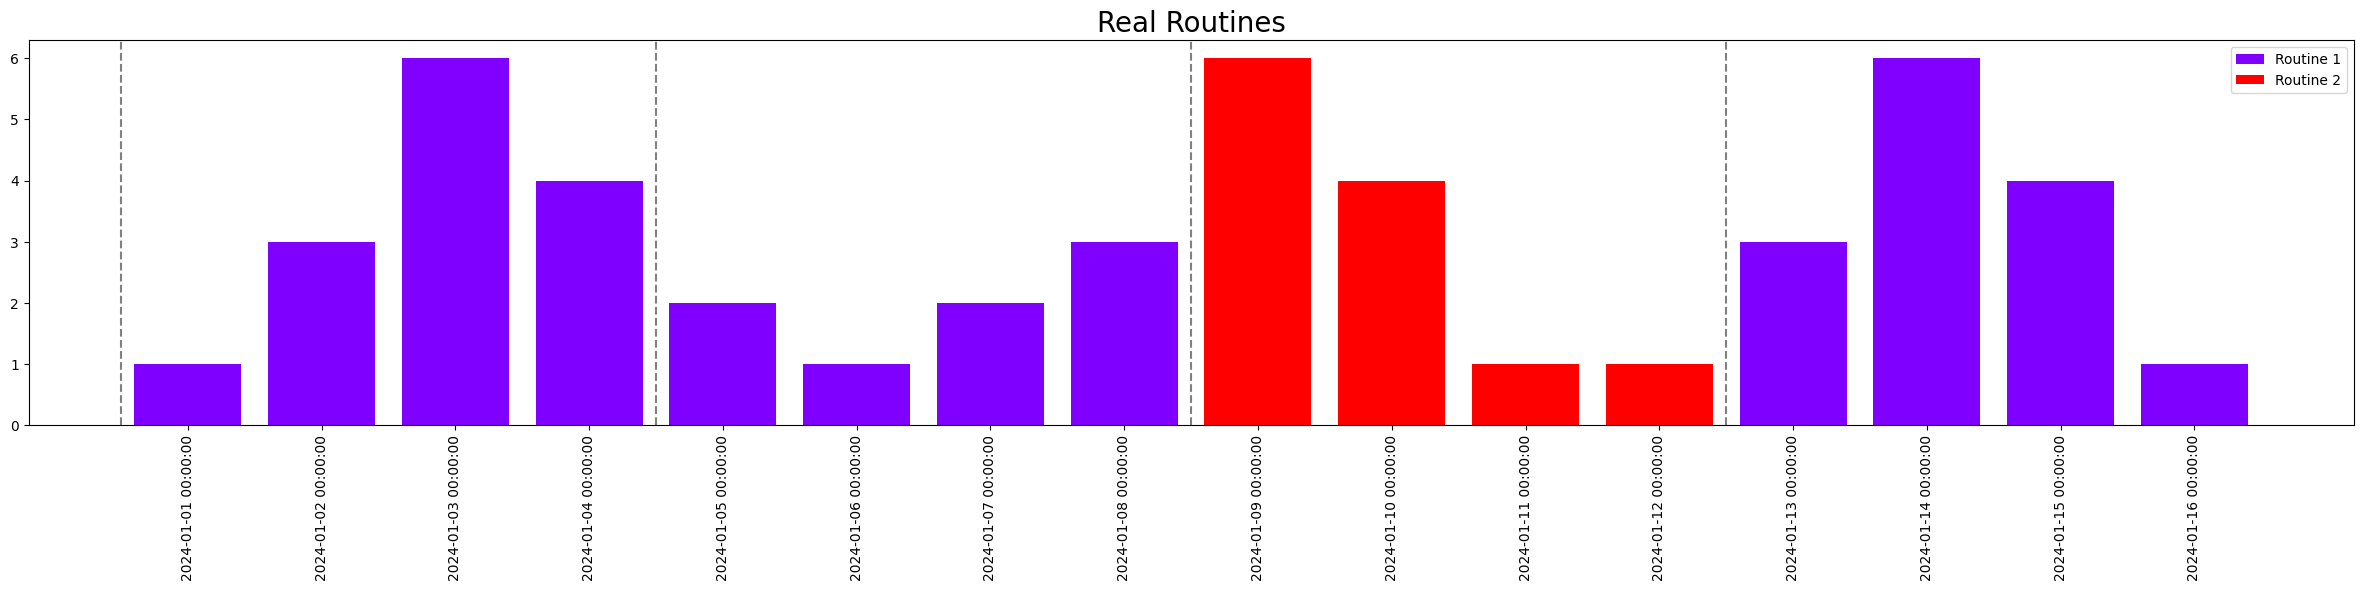

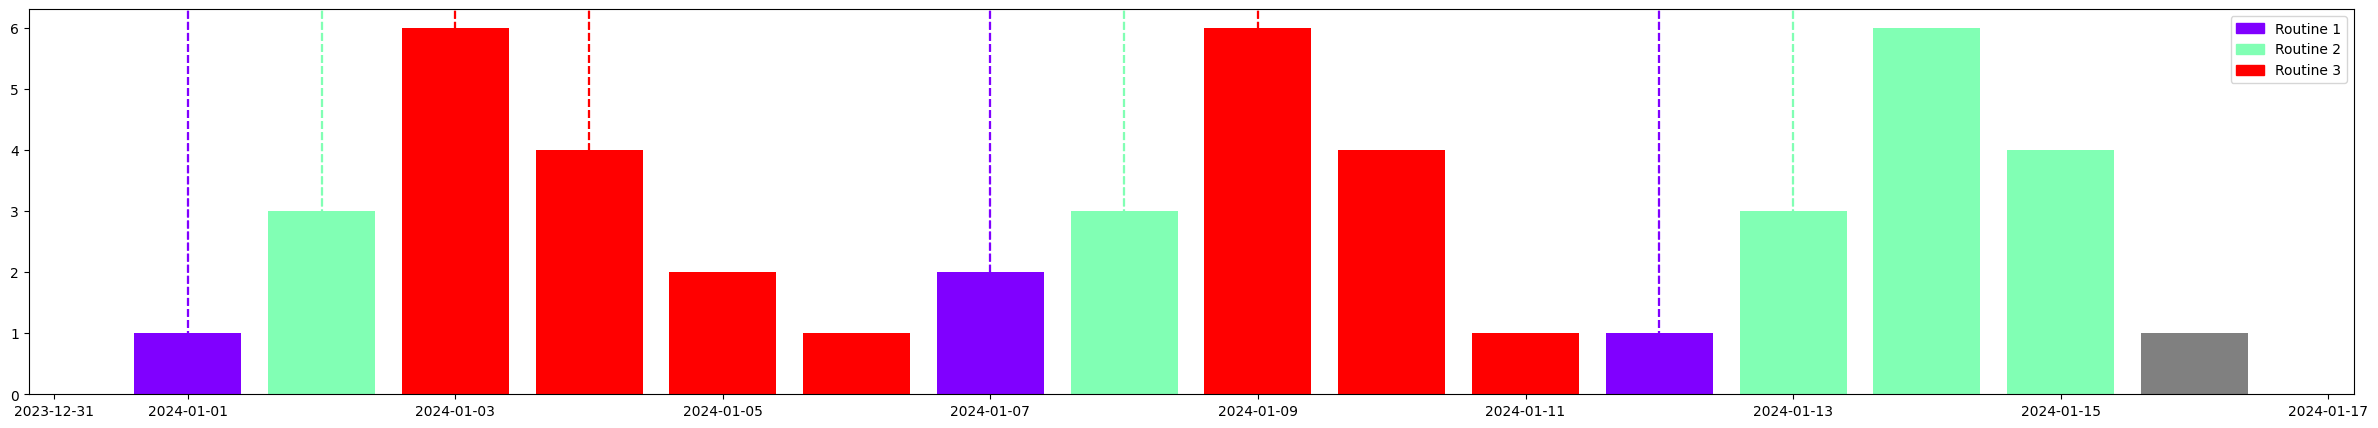

In [14]:
plot_groundtruth(time_series)
routines.plot_results(figsize=(30, 5), title_fontsize=20)